# **Machine Learning (ML) modeling for differential gene expression analysis results (logFC, p-values, etc.)**

1.Loads the data

2.Preprocesses it

3.Performs classification (upregulated vs. downregulated genes)

4.Builds an ML pipeline with scaling + a simple ML model (e.g., Random Forest)

5.Evaluates performance with metrics

Genes with logFC > 0 = Upregulated (class 1)

Genes with logFC < 0 = Downregulated (class 0)

In [ ]:
!pip install pandas scikit-learn numpy

In [4]:
# ML Modeling for Gene Expression Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

# --- Step 1: Load data ---
data = pd.read_csv("gene_expression_data.csv")  # Save your data in CSV first

# --- Step 2: Preprocessing ---
# Create binary target: 1 = Upregulated, 0 = Downregulated
data['target'] = np.where(data['logFC'] > 0, 1, 0)

# Features (drop name and target for ML model)
X = data.drop(columns=['name', 'target'])
y = data['target']

# --- Step 3: Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 4: ML Pipeline with Scaling + Random Forest ---
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# --- Step 5: Model Training ---
pipeline.fit(X_train, y_train)

# --- Step 6: Model Evaluation ---
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Step 7: Cross-Validation for Robustness ---
cv_scores = cross_val_score(pipeline, X, y, cv=5)
print("\nCross-validation Accuracy:", cv_scores.mean())


Accuracy: 1.0

Confusion Matrix:
 [[56  0]
 [ 0  4]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00         4

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Cross-validation Accuracy: 1.0


Best Hyperparameters: {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 50}
Accuracy with Tuned Model: 1.0

Confusion Matrix:
 [[56  0]
 [ 0  4]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00         4

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Cross-validation Accuracy: 1.0


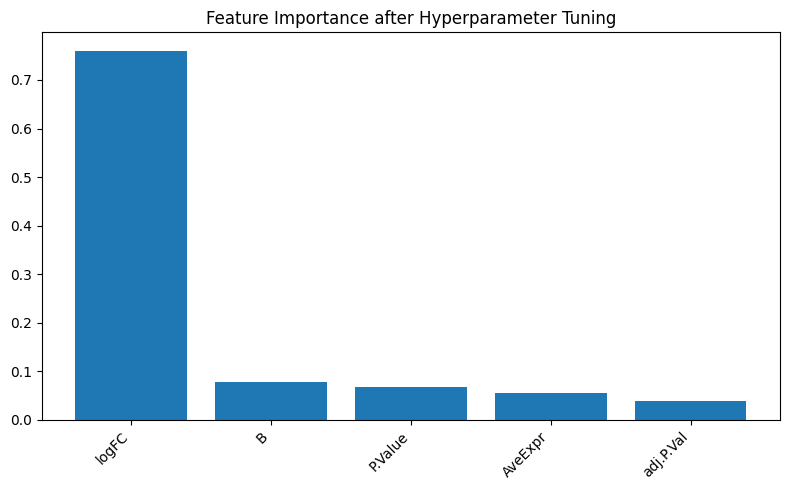

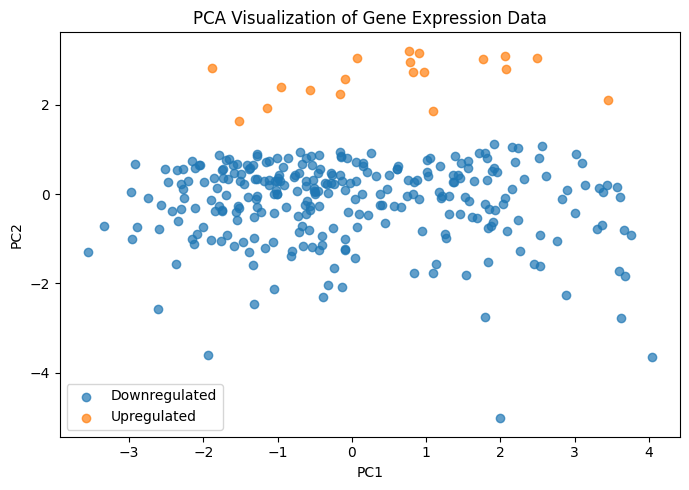

In [6]:
# ML Modeling for Gene Expression Data with Feature Importance, PCA, and Hyperparameter Tuning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline



# --- Step 8: Hyperparameter Tuning using GridSearchCV ---
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 5, 10],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# --- Step 9: Evaluate the Best Model ---
y_pred = best_model.predict(X_test)
print("Accuracy with Tuned Model:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Step 10: Cross-Validation Accuracy ---
cv_scores = cross_val_score(best_model, X, y, cv=5)
print("\nCross-validation Accuracy:", cv_scores.mean())

# --- Step 11: Feature Importance ---
rf_model = best_model.named_steps['rf']
feature_importances = rf_model.feature_importances_

features = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(8,5))
plt.bar(range(len(features)), feature_importances[indices], align='center')
plt.xticks(range(len(features)), features[indices], rotation=45, ha='right')
plt.title("Feature Importance after Hyperparameter Tuning")
plt.tight_layout()
plt.show()

# --- Step 12: PCA Visualization ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], label='Downregulated', alpha=0.7)
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], label='Upregulated', alpha=0.7)
plt.title("PCA Visualization of Gene Expression Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()


# **Modeling, feature importance, PCA visualization, and hyperparameter tuning**

Multiple Models: Random Forest, Logistic Regression, SVM, XGBoost

Cross-validation Accuracy for robust comparison

Best Model Selection automatically based on accuracy

PCA Visualization using the best-performing model


Model: Random Forest
Test Accuracy: 0.9166666666666666
Cross-validation Accuracy: 1.0
Confusion Matrix:
 [[55  1]
 [ 4  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96        56
           1       0.00      0.00      0.00         4

    accuracy                           0.92        60
   macro avg       0.47      0.49      0.48        60
weighted avg       0.87      0.92      0.89        60


Model: Logistic Regression
Test Accuracy: 0.9333333333333333
Cross-validation Accuracy: 1.0
Confusion Matrix:
 [[56  0]
 [ 4  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        56
           1       0.00      0.00      0.00         4

    accuracy                           0.93        60
   macro avg       0.47      0.50      0.48        60
weighted avg       0.87      0.93      0.90        60


Model: SVM
Test Accuracy: 0.9333333333333

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m


Model: XGBoost
Test Accuracy: 0.9166666666666666
Cross-validation Accuracy: 0.9966666666666667
Confusion Matrix:
 [[55  1]
 [ 4  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96        56
           1       0.00      0.00      0.00         4

    accuracy                           0.92        60
   macro avg       0.47      0.49      0.48        60
weighted avg       0.87      0.92      0.89        60



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:18:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:18:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


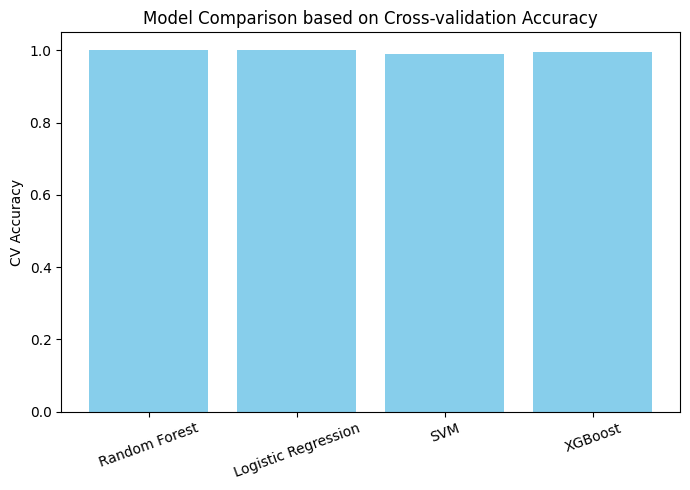

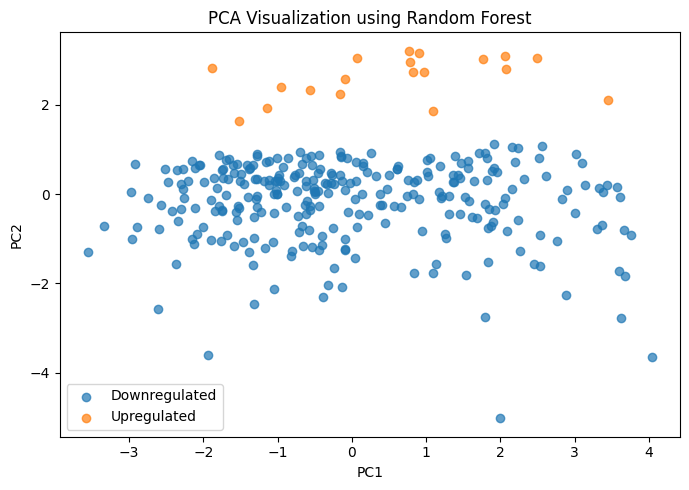

In [7]:
# Gene Expression ML Modeling with Multiple Model Comparison, PCA, and Hyperparameter Tuning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier



# --- Step 13: Define Multiple Models ---
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='rbf', probability=True),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
}

# --- Step 14: Train and Evaluate Each Model ---
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    cv_acc = cross_val_score(model, X, y, cv=5).mean()

    results[name] = {"Test Accuracy": acc, "CV Accuracy": cv_acc}
    print(f"\nModel: {name}")
    print("Test Accuracy:", acc)
    print("Cross-validation Accuracy:", cv_acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# --- Step 15: Compare Models Visually ---
plt.figure(figsize=(7,5))
plt.bar(results.keys(), [v["CV Accuracy"] for v in results.values()], color='skyblue')
plt.title("Model Comparison based on Cross-validation Accuracy")
plt.ylabel("CV Accuracy")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# --- Step 16: PCA Visualization for Best Model ---
best_model_name = max(results, key=lambda x: results[x]["CV Accuracy"])
best_model = models[best_model_name]

# Fit best model on scaled data
best_model.fit(X_train_scaled, y_train)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaler.fit_transform(X))

plt.figure(figsize=(7,5))
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], label='Downregulated', alpha=0.7)
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], label='Upregulated', alpha=0.7)
plt.title(f"PCA Visualization using {best_model_name}")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()


**LASSO model**
LASSO is essentially Logistic Regression with L1 regularization for classification tasks. It does two things:

Classification of upregulated vs. downregulated genes

Feature selection by shrinking some coefficients to zero → helps identify important features

LASSO Logistic Regression
Test Accuracy: 1.0

Confusion Matrix:
 [[56  0]
 [ 0  4]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00         4

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Cross-validation Accuracy: 1.0


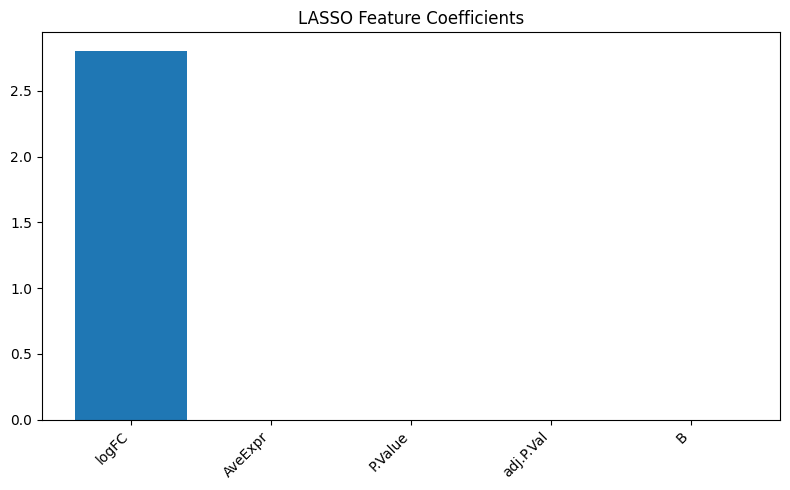

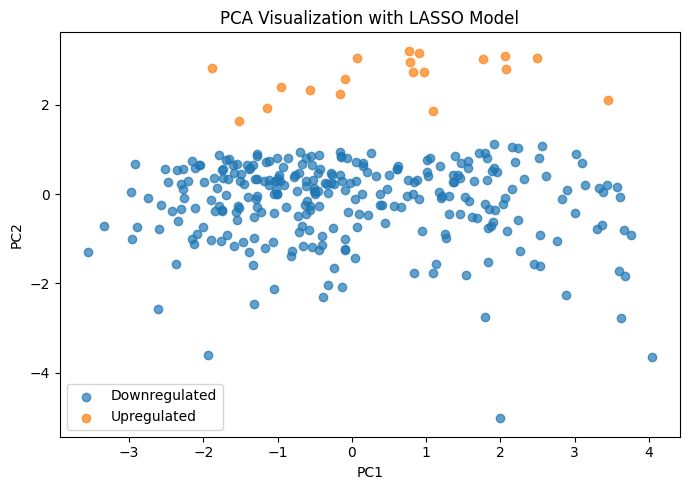

In [ ]:
# Gene Expression ML Modeling using LASSO (Logistic Regression with L1 Regularization)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- Step 1: Load data ---
data = pd.read_csv("gene_expression_data.csv")  # Save data in CSV first

# --- Step 2: Preprocessing ---
# Create binary target: 1 = Upregulated, 0 = Downregulated
data['target'] = np.where(data['logFC'] > 0, 1, 0)

# Features and target
X = data.drop(columns=['name', 'target'])
y = data['target']

# --- Step 3: Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 4: Scale Features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Step 5: LASSO Logistic Regression (L1 Regularization) ---
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

# --- Step 6: Evaluation ---
y_pred = lasso_model.predict(X_test_scaled)

print("LASSO Logistic Regression")
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Step 7: Cross-Validation ---
cv_scores = cross_val_score(lasso_model, X, y, cv=5)
print("\nCross-validation Accuracy:", cv_scores.mean())

# --- Step 8: Feature Importance (Non-zero Coefficients) ---
coefficients = lasso_model.coef_[0]
features = X.columns

plt.figure(figsize=(8,5))
plt.bar(features, coefficients)
plt.title("LASSO Feature Coefficients")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- Step 9: PCA Visualization ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaler.fit_transform(X))

plt.figure(figsize=(7,5))
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], label='Downregulated', alpha=0.7)
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], label='Upregulated', alpha=0.7)
plt.title("PCA Visualization with LASSO Model")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()
